# Convolutional Neural Networks - Dog Identification App 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling. 

In this setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Datasets" data-toc-modified-id="Import-Datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Datasets</a></span></li><li><span><a href="#Detect-Humans" data-toc-modified-id="Detect-Humans-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Detect Humans</a></span><ul class="toc-item"><li><span><a href="#Write-a-Human-Face-Detector" data-toc-modified-id="Write-a-Human-Face-Detector-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Write a Human Face Detector</a></span></li><li><span><a href="#Assess-the-Human-Face-Detector" data-toc-modified-id="Assess-the-Human-Face-Detector-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Assess the Human Face Detector</a></span></li></ul></li><li><span><a href="#Detect-Dogs" data-toc-modified-id="Detect-Dogs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Detect Dogs</a></span><ul class="toc-item"><li><span><a href="#Obtain-Pre-trained-VGG-16-Model" data-toc-modified-id="Obtain-Pre-trained-VGG-16-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Obtain Pre-trained VGG-16 Model</a></span></li><li><span><a href="#Making-Predictions-with-a-Pre-trained-Model" data-toc-modified-id="Making-Predictions-with-a-Pre-trained-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Making Predictions with a Pre-trained Model</a></span></li><li><span><a href="#Write-a-Dog-Detector" data-toc-modified-id="Write-a-Dog-Detector-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Write a Dog Detector</a></span></li><li><span><a href="#Assess-the-Dog-Detector" data-toc-modified-id="Assess-the-Dog-Detector-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Assess the Dog Detector</a></span></li></ul></li><li><span><a href="#Create-a-CNN-to-Classify-Dog-Breeds-(from-Scratch)" data-toc-modified-id="Create-a-CNN-to-Classify-Dog-Breeds-(from-Scratch)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create a CNN to Classify Dog Breeds (from Scratch)</a></span><ul class="toc-item"><li><span><a href="#Specify-Data-Loaders-for-the-Dog-Dataset" data-toc-modified-id="Specify-Data-Loaders-for-the-Dog-Dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Specify Data Loaders for the Dog Dataset</a></span></li><li><span><a href="#Model-Architecture" data-toc-modified-id="Model-Architecture-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model Architecture</a></span></li><li><span><a href="#Specify-Loss-Function-and-Optimizer" data-toc-modified-id="Specify-Loss-Function-and-Optimizer-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Specify Loss Function and Optimizer</a></span></li><li><span><a href="#Train-and-Validate-the-Model" data-toc-modified-id="Train-and-Validate-the-Model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Train and Validate the Model</a></span></li><li><span><a href="#Test-the-Model" data-toc-modified-id="Test-the-Model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Test the Model</a></span></li></ul></li><li><span><a href="#Create-a-CNN-to-Classify-Dog-Breeds-(using-Transfer-Learning)" data-toc-modified-id="Create-a-CNN-to-Classify-Dog-Breeds-(using-Transfer-Learning)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create a CNN to Classify Dog Breeds (using Transfer Learning)</a></span><ul class="toc-item"><li><span><a href="#Specify-Data-Loaders-for-the-Dog-Dataset" data-toc-modified-id="Specify-Data-Loaders-for-the-Dog-Dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Specify Data Loaders for the Dog Dataset</a></span></li><li><span><a href="#Model-Architecture" data-toc-modified-id="Model-Architecture-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model Architecture</a></span></li><li><span><a href="#Specify-Loss-Function-and-Optimizer" data-toc-modified-id="Specify-Loss-Function-and-Optimizer-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Specify Loss Function and Optimizer</a></span></li><li><span><a href="#Train-and-Validate-the-Model" data-toc-modified-id="Train-and-Validate-the-Model-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Train and Validate the Model</a></span></li><li><span><a href="#Test-the-Model" data-toc-modified-id="Test-the-Model-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Test the Model</a></span></li><li><span><a href="#Predict-Dog-Breed-with-the-Model" data-toc-modified-id="Predict-Dog-Breed-with-the-Model-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Predict Dog Breed with the Model</a></span></li></ul></li><li><span><a href="#Write-your-Algorithm" data-toc-modified-id="Write-your-Algorithm-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Write your Algorithm</a></span><ul class="toc-item"><li><span><a href="#Test-Your-Algorithm-on-Sample-Images!" data-toc-modified-id="Test-Your-Algorithm-on-Sample-Images!-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Test Your Algorithm on Sample Images!</a></span></li></ul></li></ul></div>

In [42]:
import os
import numpy as np
from glob import glob
from tqdm import tqdm
import cv2  

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import datasets

import matplotlib.pyplot as plt                        
%matplotlib inline

# Check if CUDA is available
use_cuda = torch.cuda.is_available()

## Import Datasets

Make sure that you've downloaded the required human and dog datasets:

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
# Load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# Print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


## Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


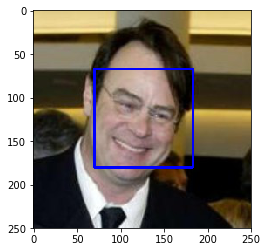

In [3]:
# Extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# Load color (BGR) image
img = cv2.imread(human_files[0])
# Convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find faces in image
faces = face_cascade.detectMultiScale(gray)

# Print number of faces detected in the image
print('Number of faces detected:', len(faces))

# Get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# Convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# Returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

In [5]:
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

human_files_count = 0
dog_files_count = 0

for img in tqdm(human_files_short):
    human_files_count += face_detector(img)
for img in tqdm(dog_files_short):
    dog_files_count += face_detector(img)


print(f"in human_files: {human_files_count/100:.1%}")
print(f"in dog_files: {dog_files_count/100:.1%}%")

100%|██████████| 100/100 [00:30<00:00,  3.32it/s]

in human_files: 98.0%
in dog_files: 17.0%%


## Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
# Define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 100337140.30it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    img_transform = transforms.Compose([transforms.Resize(255),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225]),
                                       ])
    
    img_pil = Image.open(img_path)
    img_tensor = img_transform(img_pil)
    img_tensor.unsqueeze_(0)
    if use_cuda:
        img_tensor = img_tensor.cuda()
    output = VGG16(img_tensor)
    _, preds = torch.max(output, 1)
    
    return preds.item() # predicted class index

In [11]:
VGG16_predict(dog_files[0])

243

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
# Return "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path): 
    return VGG16_predict(img_path) in range(151, 269)

In [13]:
dog_detector(dog_files[0])

True

### Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

In [14]:
#  Test the performance of the dog_detector function
# on the images in human_files_short and dog_files_short.

human_files_count = 0
dog_files_count = 0

for img in tqdm(human_files_short):
    human_files_count += dog_detector(img)
for img in tqdm(dog_files_short):
    dog_files_count += dog_detector(img)


print(f"in human_files: {human_files_count/100:.1%}")
print(f"in dog_files: {dog_files_count/100:.1%}")

100%|██████████| 100/100 [00:04<00:00, 25.61it/s]

in human_files: 0.0%
in dog_files: 100.0%


## Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [16]:
### Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_transforms = {
    'train': transforms.Compose(
        [transforms.Resize(256),
         transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),
         transforms.RandomRotation(10),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(), 
         transforms.Normalize([0.485, 0.456, 0.406],
                              [0.229, 0.224, 0.225])
        ]),
    'valid_test': transforms.Compose(
        [transforms.Resize(256),
         transforms.CenterCrop(224),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406],
                              [0.229, 0.224, 0.225])
        ]),
}

img_train = datasets.ImageFolder('/data/dog_images/train', transform=data_transforms['train'])
img_valid = datasets.ImageFolder('/data/dog_images/valid', data_transforms['valid_test'])
img_test = datasets.ImageFolder('/data/dog_images/test', data_transforms['valid_test'])

loaders_scratch = {
    'train': torch.utils.data.DataLoader(img_train, batch_size=32, shuffle=True, num_workers=0),
    'valid': torch.utils.data.DataLoader(img_valid, batch_size=32, shuffle=True, num_workers=0),
    'test': torch.utils.data.DataLoader(img_test, batch_size=32, shuffle=True, num_workers=0),
}

In [17]:
# load list of dog names
class_names = img_train.classes

# Print some stats
print("Total dog breeds (target classes):", len(class_names))
print("Total images:", len(img_train + img_valid + img_test))
print("\nTrain images:", len(img_train))
print("Validation images:", len(img_valid))
print("Test images:", len(img_test))

Total dog breeds (target classes): 133
Total images: 8351

Train images: 6680
Validation images: 835
Test images: 836


/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


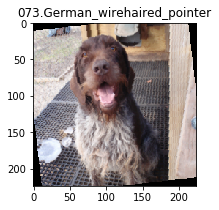

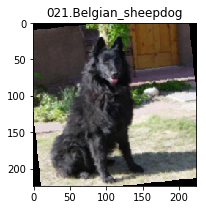

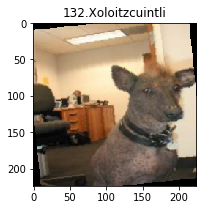

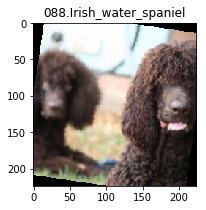

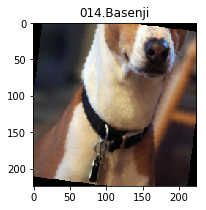

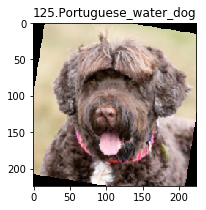

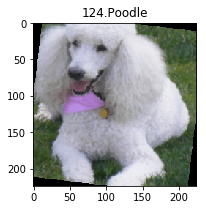

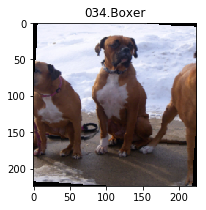

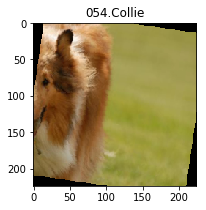

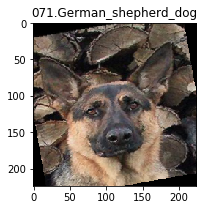

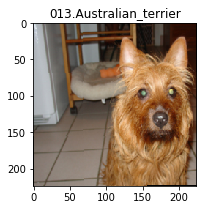

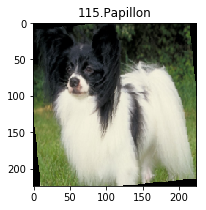

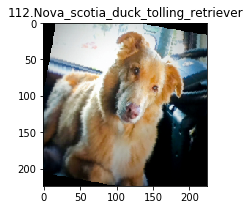

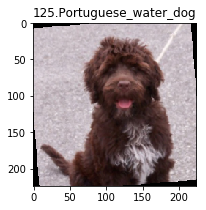

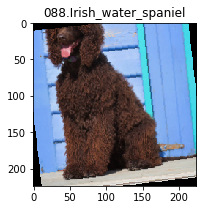

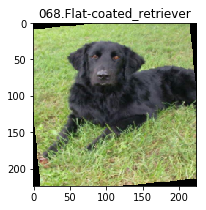

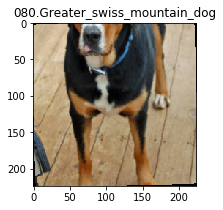

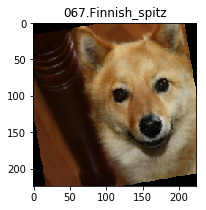

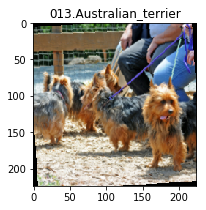

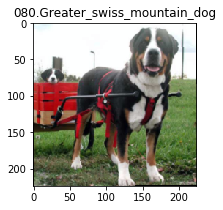

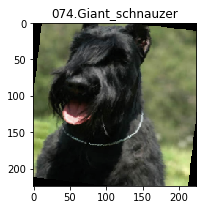

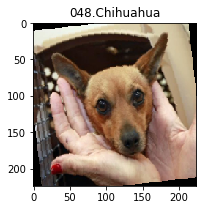

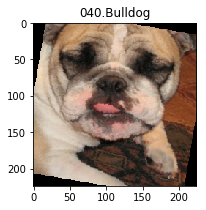

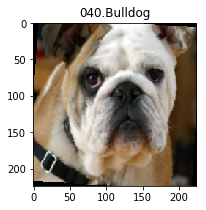

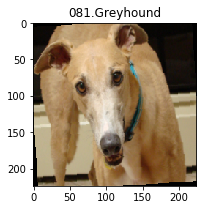

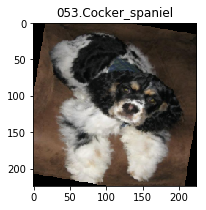

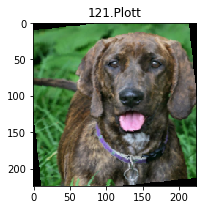

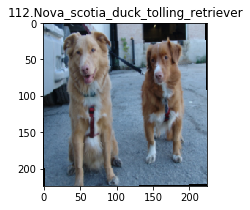

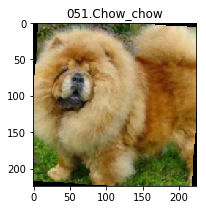

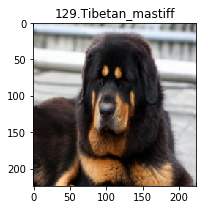

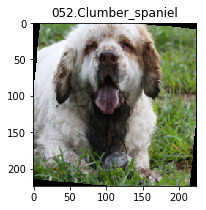

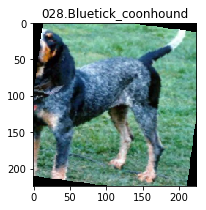

In [4]:
# Visualize a batch of training data
images, labels = next(iter(loaders_scratch['train']))

for image, label in zip(images, labels): 
    image = image.clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
     
    fig = plt.figure(figsize=(12,3))
    plt.imshow(image)
    plt.title(class_names[label])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

It took the VGG16 paper (Simonyan K., Zisserman A., 2015) as a rough guideline for this project. Accordingly I chose a 224x224 px image as input tensor, randomly cropped from a 256x265 px rescaled version of the orignal image. 

- Training data: Has some noise added by random rotation, random flipping (horizontally) and random cropping. To make sure we get the necessary features in our cropped input images,  I decided to finetune the scale of the random crop after visually inspecting a batch of the training data. (With the default settings I did not always get the relevant areas.) For normalization I used the same means and standard deviations as were used for the VGG16 training, a (default) alternative would have been to normalize with all values set to 0.5.

- Validation and Test data: Generally the same as for the training data, but without the addition of noise. The images are cropped from the center.

A note concerning the image dimensions: I believe the starting size of 224 was chosen to end up with an image of 7x7 px, that  has a center point after 5 maxpool iterations.

### Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [8]:
# Define the CNN architecture

class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.convolutional = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
#             nn.Dropout(0.2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
#             nn.Dropout(0.1),
            nn.Conv2d(128, 256, 3, padding=1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
#             nn.Dropout(0.1),
            nn.Conv2d(256, 512, 3, padding=1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
#             nn.Dropout(0.1),
            nn.Conv2d(512, 512, 3, padding=1),
            nn.MaxPool2d(2, 2),
            nn.ReLU(True),
#             nn.Dropout(0.1),
        )        
        self.dense = nn.Sequential(
            nn.Linear(512 * 7 * 7, 512),
            nn.BatchNorm1d(num_features=512),
            nn.ReLU(True),
            nn.Dropout(0.25),
            nn.Linear(512, 512),
            nn.BatchNorm1d(num_features=512),
            nn.ReLU(True),
            nn.Dropout(0.25),
            nn.Linear(512, 133),
#             nn.Softmax(dim=1),
        )
    
    def forward(self, x):
        x = self.convolutional(x)
        x = x.view(-1, (512 * 7 * 7))
        x = self.dense(x)
        
        return x

# Instantiate the CNN
model_scratch = Net()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [9]:
print(model_scratch)

Net(
  (convolutional): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU(inplace)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU(inplace)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU(inplace)
    (9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU(inplace)
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU(inplace)
  )
  (dense): Sequential(
    (0): Linear(

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Again I took the VGG16 paper as a guideline (see Answer 3), and followed the simplest of the described models (Table 1, Column A) for the network architecture. 

Because we don't have to achieve high accuracy I further simplified it and chose to work with 5 conv layers only instead of 8. They all work with a kernel size of 3x3 and a padding of 1, which gradually increases the number of feature maps, but keeps the size. In between every convolutional layer, there is a maxpool layer with a 2x2 kernel and a stride of 2, that halfs the size of all featuremaps. After 5 convolutions and maxpool layers we end up with 512 7x7 feature maps.

Then the feature maps are flattened  and fed into 3 fully connected  layers for classification. In comparison to the VGG16 paper I reduced the number of nodes per layer as we have only 133 classes, instead of a 1000.

Further deviations from the original network:
- I omitted it's final softmax layer because we us PyTorch's CrossEntropyLoss() for training, which combines log-softmax output-layer activation and a negative log-likelhood loss-function. When testing the neural net, the output of the network is fed into a softmax function to obtain class probabilities.
- I added two batch norm layers in between the fully connected layers, because I have [read](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c) that this could improve VGG16's performance (batch normalization is a concept that was not around at the time when VGG16 was developed). Looking at the accuracy score of 39% after 25 epochs of training, this might have been a 'lucky strike'.

In [14]:
state_dict = torch.load('model_scratch.pt')
model_scratch.load_state_dict(state_dict)

### Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """Returns trained model."""
    
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf         
    
    for epoch in range(1, n_epochs+1):
        # Initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for data, target in loaders['train']:
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # Find the loss and update the model parameters accordingly
            probs = model.forward(data)
            loss = criterion(probs, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Update the running train loss
            train_loss += loss.item()
            
        ######################    
        # validate the model #
        ######################
        with torch.no_grad():
            model.eval()
            for data, target in loaders['valid']:
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                probs = model.forward(data)
                loss = criterion(probs, target)
                # Update the running validation loss
                valid_loss += loss.item()

        # Record the average loss
        train_loss = train_loss/len(loaders['train'])
        valid_loss = valid_loss/len(loaders['valid'])

        # Print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        # Save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    
    # return trained model
    return model

In [17]:
n_epochs = 25

# Train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 15 	Training Loss: 2.652740 	Validation Loss: 2.981293
Validation loss decreased (3.148446 --> 2.981293).  Saving model ...
Epoch: 16 	Training Loss: 2.494912 	Validation Loss: 2.774284
Validation loss decreased (2.981293 --> 2.774284).  Saving model ...
Epoch: 17 	Training Loss: 2.386646 	Validation Loss: 2.737506
Validation loss decreased (2.774284 --> 2.737506).  Saving model ...
Epoch: 18 	Training Loss: 2.274742 	Validation Loss: 2.706769
Validation loss decreased (2.737506 --> 2.706769).  Saving model ...
Epoch: 19 	Training Loss: 2.230515 	Validation Loss: 2.684205
Validation loss decreased (2.706769 --> 2.684205).  Saving model ...
Epoch: 20 	Training Loss: 2.166777 	Validation Loss: 2.591222
Validation loss decreased (2.684205 --> 2.591222).  Saving model ...
Epoch: 21 	Training Loss: 2.035621 	Validation Loss: 2.581384
Validation loss decreased (2.591222 --> 2.581384).  Saving model ...
Epoch: 22 	Training Loss: 1.946240 	Validation Loss: 2.598375
Epoch: 23 	Training L

In [10]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [19]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    with torch.no_grad():
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)

    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
            100. * correct / total, correct, total))

In [13]:
# Call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.308244


Test Accuracy: 39% (332/836)


## Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### Specify Data Loaders for the Dog Dataset

In [27]:
# The transforms / loaders are identical from above

data_transforms = {
    'train': transforms.Compose(
        [transforms.Resize(256),
         transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),
         transforms.RandomRotation(10),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(), 
         transforms.Normalize([0.485, 0.456, 0.406],
                              [0.229, 0.224, 0.225])
        ]),
    'valid_test': transforms.Compose(
        [transforms.Resize(256),
         transforms.CenterCrop(224),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406],
                              [0.229, 0.224, 0.225])
        ]),
}

img_train = datasets.ImageFolder('/data/dog_images/train', transform=data_transforms['train'])
img_valid = datasets.ImageFolder('/data/dog_images/valid', data_transforms['valid_test'])
img_test = datasets.ImageFolder('/data/dog_images/test', data_transforms['valid_test'])

loaders_transfer = {
    'train': torch.utils.data.DataLoader(img_train, batch_size=32, shuffle=True, num_workers=0),
    'valid': torch.utils.data.DataLoader(img_valid, batch_size=32, shuffle=True, num_workers=0),
    'test': torch.utils.data.DataLoader(img_test, batch_size=32, shuffle=True, num_workers=0),
}

### Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [21]:
# Load pretrained ResNet50
model_transfer = models.resnet50(pretrained=True)
print(model_transfer)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [22]:
# Freeze parameters to stop backprop modification
for param in model_transfer.parameters():
    param.requires_grad = False

# Define a new classifier layer
model_transfer.fc = nn.Linear(2048, 133)


if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I chose ResNet with depth 50 as my pretrained network. ResNet won 1st price in 2015 on the ImageNet competition with having a fairly simple architecture. There are deeper versions of the Network but for our task and goal this should be enough. It's also very simple to adapt to our task because there is only one fc-layer that needs to be adapted and retrained.

Two important steps when using a pretrained network are
- freezing the network parameters of all but the final layers so that they are not altered during training
- adapting the final layers to match the problem (in this step changing the number of output features from 1000 to 133)

### Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [9]:
# Train the model
n_epochs = 5

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.247603 	Validation Loss: 0.815453
Validation loss decreased (inf --> 0.815453).  Saving model ...
Epoch: 2 	Training Loss: 0.817206 	Validation Loss: 0.634091
Validation loss decreased (0.815453 --> 0.634091).  Saving model ...
Epoch: 3 	Training Loss: 0.637283 	Validation Loss: 0.560905
Validation loss decreased (0.634091 --> 0.560905).  Saving model ...
Epoch: 4 	Training Loss: 0.568335 	Validation Loss: 0.510970
Validation loss decreased (0.560905 --> 0.510970).  Saving model ...
Epoch: 5 	Training Loss: 0.484586 	Validation Loss: 0.590056


In [23]:
# Load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.527937


Test Accuracy: 84% (710/836)


### Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [30]:

# Create a list of class names by index
class_names = [item[4:].replace("_", " ") for item in img_train.classes]

def predict_breed_transfer(img_path):
    ''' Use pre-trained ResNet50 model to return predicted dogbreed
    for image at specified path.
    
    Args:
        img_path: path to an image
        
    Returns:
        dogbreed: string with predicted dogbreed
    '''
    
    img_transform = transforms.Compose([transforms.Resize(255),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225]),
                                       ])
    
    img_pil = Image.open(img_path)
    img_tensor = img_transform(img_pil)
    img_tensor.unsqueeze_(0)
    if use_cuda:
        img_tensor = img_tensor.cuda()
    output = model_transfer(img_tensor)
    _, preds = torch.max(output, 1)
       
    return class_names[preds.item()]

In [31]:
# Test function
predict_breed_transfer('/data/dog_images/valid/001.Affenpinscher/Affenpinscher_00038.jpg')

'Affenpinscher'

## Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

In [50]:
# from IPython.display import Image as display_img # to avoid name conflict with PIL Image

def my_algorithm(img_path):
    if face_detector(img_path) == True:
        plt.imshow(Image.open(img_path))
        plt.show()
        print("Wow, this person looks almost like a: " + str(predict_breed_transfer(img_path)))
    elif dog_detector(img_path) == True:
        plt.imshow(Image.open(img_path))
        plt.show()
        print("This image shows a: " + str(predict_breed_transfer(img_path)))
    else:  
        plt.imshow(Image.open(img_path))
        plt.show()
        print("Sorry, I can neither detect a human face nor a dog.")
        

### Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

- Does not work on grayscale images, as the models expect 3 color channels
- Wont work properly on images that depict a dog and a human (even if the dog is in the center, the picture will always classify as 'human')
- The face detector and the dog breeder could be further improved, the first by training a NN with transfer learning, the second with a couple of training loops more.

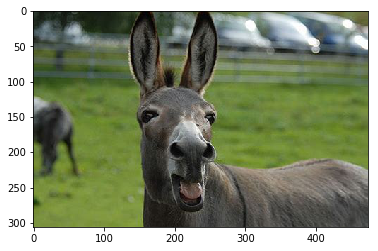

Sorry, I can neither detect a human face nor a dog.


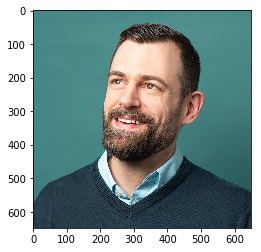

Wow, this person looks almost like a: Poodle


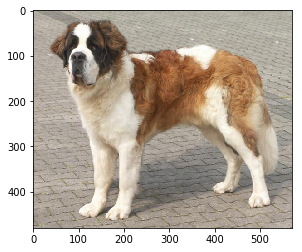

This image shows a: Saint bernard


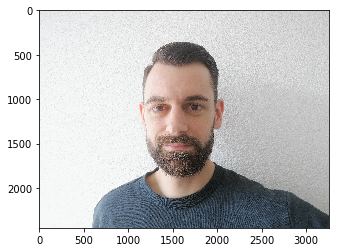

Wow, this person looks almost like a: English toy spaniel


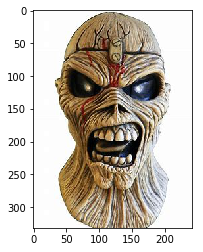

Sorry, I can neither detect a human face nor a dog.


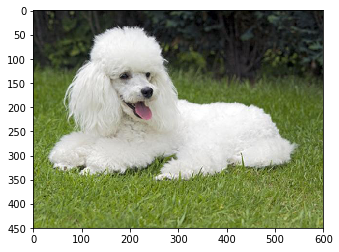

This image shows a: Poodle


In [55]:
# Run the algorithm on testfiles

test_files = np.array(glob("test_images_raph/*"))
for file_path in test_files:
    my_algorithm(file_path)

---